<a href="https://colab.research.google.com/github/NRJaggers/Applied-Stochastic-Processes/blob/main/PracticeProblems/Metropolis_Hastings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metropolis-Hastings Algorithm

---

## Prompt

Original Prompt can be found [here](https://bookdown.org/kevin_davisross/applied-stochastic-processes/pp-metropolis.html). A copy of the prompt  can be found on github under [/PracticeProblems/Prompts](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/PracticeProblems/Prompts) along with completed exercises under [/PracticeProblems](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/PracticeProblems).

---

## Problems

###1.

$$
\begin{array}
x & & 0 & & 1 & & 2 & & 3 & & 4 & & 5\\
\text{P}(X=x) & & 0.15 & & 0.18 & &  0.35& & 0.20 & & 0.08 & &0.04  
\end{array}
$$

####a.

Our proposal matrix will be a symmetric matrix that represents the random walk to neighboring states probabilities. This will leave our acceptance probability as just the ratio of the proposed state over the current state from the desired distribution.

Multiplying the proposed and acceptance outcomes will tell us our next move.

####b.

In [45]:
import numpy as np

pi = np.array([0.15, 0.18, 0.35, 0.20, 0.08, 0.04])

steps = 10000

sim = np.zeros(steps)
sim[0] = 0

for i in range(1,steps):
    current = round(sim[i-1])

    up = min([current + 1, 5])
    down = max([current - 1, 0])
    proposed = up if np.random.rand() > 0.5 else down

    ratio = pi[proposed]/pi[current]
    prob_accept = min([ratio, 1])

    accepted = proposed if np.random.rand() < prob_accept else current

    sim[i] = accepted


distribution = np.array([np.sum(sim == 0), np.sum(sim == 1), np.sum(sim == 2), np.sum(sim == 3), np.sum(sim == 4), np.sum(sim == 5),])
distribution = distribution/steps
print(distribution)

[0.1518 0.1799 0.3504 0.2018 0.0785 0.0376]


As you increase the number of steps, the simulated distribution seems to better approximate the desired distribution.

####c.

In [63]:
P = np.zeros([6,6])

steps = 10000

sim = np.zeros(steps)
sim[0] = 0

for i in range(1,steps):
    current = round(sim[i-1])

    up = min([current + 1, 5])
    down = max([current - 1, 0])
    proposed = up if np.random.rand() > 0.5 else down

    ratio = pi[proposed]/pi[current]
    prob_accept = min([ratio, 1])

    accepted = proposed if np.random.rand() < prob_accept else current

    sim[i] = accepted

    P[current,accepted] += 1

row_totals = P.sum(axis=1, keepdims=True)

P = P / row_totals

print(P)

[[0.49627624 0.50372376 0.         0.         0.         0.        ]
 [0.41531582 0.08384572 0.50083846 0.         0.         0.        ]
 [0.         0.25615341 0.45191757 0.29192902 0.         0.        ]
 [0.         0.         0.51180311 0.28829734 0.19989955 0.        ]
 [0.         0.         0.         0.47659064 0.28331333 0.24009604]
 [0.         0.         0.         0.         0.48192771 0.51807229]]


####d.

In [64]:
def compute_stationary_distribution(P):
    s = P.shape[0]
    identity_matrix = np.eye(s)
    ones_matrix = np.ones((s, s))

    # Compute the stationary distribution
    stationary_distribution = np.dot(np.ones(s), np.linalg.solve(identity_matrix - P + ones_matrix, np.eye(s)))

    return stationary_distribution

stationary_distribution = compute_stationary_distribution(P)
print("Stationary Distribution:")
print(stationary_distribution)

Stationary Distribution:
[0.14734132 0.17870575 0.34941058 0.19930142 0.08359431 0.04164662]


The simulated stationary distribution is very close to the target distribution.

###2.

$$f(x) \propto e^{-|x|}, \qquad -\infty<x<\infty$$

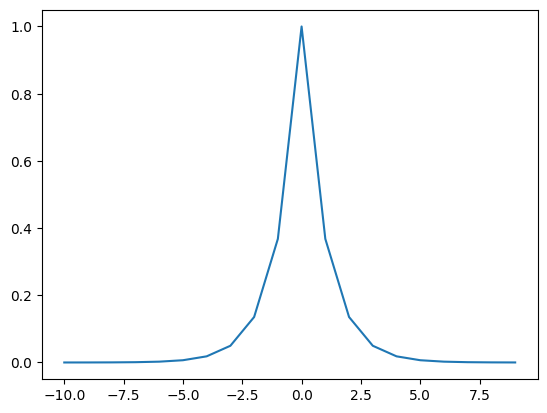

In [78]:
import matplotlib.pyplot as plt
plt_range = 10
x = np.arange(-plt_range,plt_range,1)
y = np.exp(-abs(x))

plt.plot(x,y)

####a.

We can follow a similar approch as before. We are given no proposed matrix this time so we can either choose one if we assume this is discrete state and discrete time, or if we want to do continuous state we can choose a continous state we are comfortable with.

Here we will use normal distribution to propose values and the function above to calculate probabilities of acceptance.

####b.

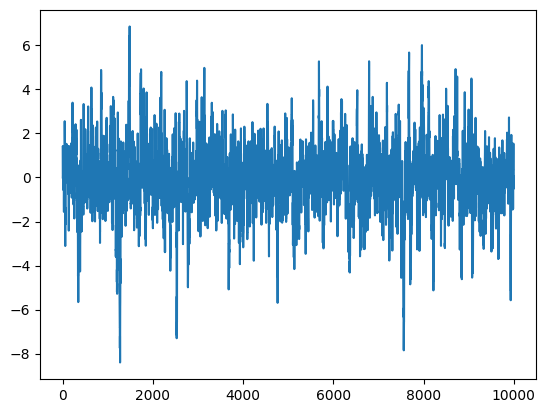

In [99]:
def f(x):
  return np.exp(-abs(x))

steps = 10000

sim = np.zeros(steps)

for i in range(1,steps):
    #define current step
    current = sim[i-1]

    #generate proposal
    proposed = np.random.normal(current, scale=1)

    #find probability of acceptance
    ratio = f(proposed)/f(current)
    prob_accept = min([ratio, 1])

    #simulate
    accepted = proposed if np.random.rand() < prob_accept else current

    sim[i] = accepted

plt.plot(sim)

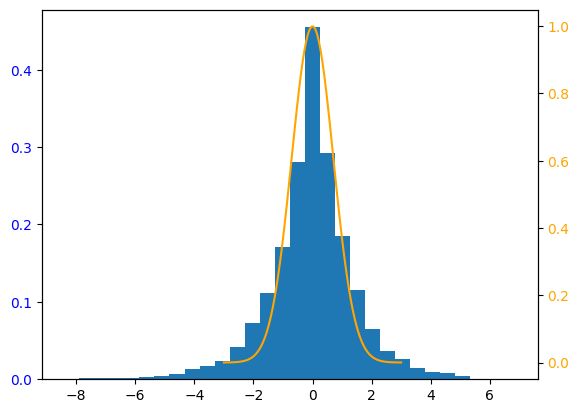

In [103]:
# Create figure and primary axis
fig, ax1 = plt.subplots()

# Plot the histogram on the primary y-axis
ax1.hist(sim, bins=30, density=True)
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary axis
ax2 = ax1.twinx()

# Plot the line plot on the secondary y-axis
ax2.plot(x, y, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.show()


The bins and the target distribution do seem to match.

---

## Reflection

With each Practice Problem submission, you should also take a few minutes to reflect on the practice problems and related material and thoughtfully respond to the following.

1. Write a sentence or two summarizing - in your own words - one big idea from this material.
2. Describe one particular aspect of this material that you found challenging and why. Then describe how you dealt with the challenge, or what you can do to deal with the challenge.
3. Write at least one specific question you have about this material. I strongly encourage you to post your questions directly in Discord as that's where I'll respond to questions. That is, if you really want an answer to your question - which I hope you do! - please post the question directly in Discord.

The main idea from this homework was practicing the application of the MH algorithm we learned in class. Although we talked about the general steps before, with these problems you fill in the gaps of knowlege on how to set things up by working through them.